# 루브릭 평가 기준

### 평가 문항
1. 3가지 데이터셋의 구성을 파악하고, 데이터를 이해하는 과정이 포함되어있는가?
2. 3가지 데이터셋에 대해 각각 5가지 모델을 이용하여 학습을 수행하고 결과값을 얻었는가?
3. 3가지 데이터셋에 대해 모델의 평가 지표를 선택하고, 그 이유를 근거를 바탕으로 서술하였는가?

### 상세 기준
- feature와 label 선정을 위한 데이터 분석과정을 전개함
- 모델학습 및 테스트가 정상적으로 수행되고, 결과값을 얻었음
- 모델학습을 통해 얻은 결과물을 바탕으로 평가지표를 선택하고, 본인의 의견을 서술하였음

# 모듈 import

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
%matplotlib inline 

## 손글씨 분류

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
print(digits.DESCR) #데이터 설명서

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [5]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
digits.target_names #총 10개의 label로 구성되어 있음

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
digits_label = digits.target
digits_label

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
import pandas as pd
digits_df = pd.DataFrame(data = digits_data, columns=digits.feature_names)
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [9]:
digits_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


- 모델의 값들이 상대적으로 크게 차이 나는 것들이 없기 때문에 표준화 변환 작업은 하지 않아도 될것으로 생각된다.

In [10]:
digits_label_df = pd.DataFrame(digits_label)
digits_label_df.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

- 클래스의 숫자가 대체적으로 골고루 나뉘어져 있음

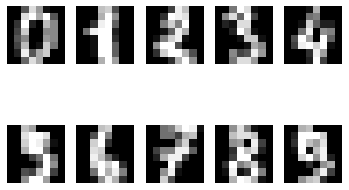

In [11]:
for i in range(10):
    plt.subplot(2, 5, i+1) # 10개의 이미지를 2행 5열로 표시
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray') 
    # plt.imshow()는 (m,n) 형태의 데이터를 입력으로 받기 때문에
    # 데이터셋 내의 1열로 펼쳐진 64개의 데이터를 원래의 이미지 형태인 (8,8)로 복원
    # cmap은 해당 이미지의 색상을 지정(gray는 흑백으로 출력)
    plt.axis('off') # 축을 보이지 않게 해줍니다. 
plt.show()

### train_test_split
- train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
- arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)
- test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
- train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)
- random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)
- shuffle : 데이터를 랜덤으로 섞을지 말지 결정(default = True)
- stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.


In [12]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=digits_label)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


### 모델 학습

#### Decision tree
- criterion : 분할 품질을 측정하는 기능 (default : gini)
- splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
- max_depth : 트리의 최대 깊이 (값이 클수록 모델의 복잡도가 올라간다.)
- min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- max_features : 각 노드에서 분할에 사용할 특징의 최대 수
- random_state : 난수 seed 설정
- max_leaf_nodes : 리프 노드의 최대수
- min_impurity_decrease : 최소 불순도
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- class_weight : 클래스 가중치
- presort : 데이터 정렬 필요 여부

In [13]:
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=20) #가지치기 최대 깊이 20
decision_tree.fit(X_train, y_train) #학습

y_pred = decision_tree.predict(X_test) #예측
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.84      0.72      0.78        36
           2       0.78      0.80      0.79        35
           3       0.79      0.81      0.80        37
           4       0.86      0.86      0.86        36
           5       0.88      0.95      0.91        37
           6       0.81      0.83      0.82        36
           7       0.84      0.86      0.85        36
           8       0.71      0.69      0.70        35
           9       0.82      0.75      0.78        36

    accuracy                           0.82       360
   macro avg       0.82      0.82      0.82       360
weighted avg       0.82      0.82      0.82       360



- 모델의 정확도는 82%가 나왔음
- DecisionTreeClassifier의 인자인 max_depth를 3부터 여러가지의 숫자로 실험을 해봤는데 낮을수록 나무의 깊이가 깊지 않아 성능이 낮았으며, 10이상부터는 82%로 수렴하였음
- 다른 인자를 섞어서 써보면 성능을 올릴 수 있을것으로 생각됨

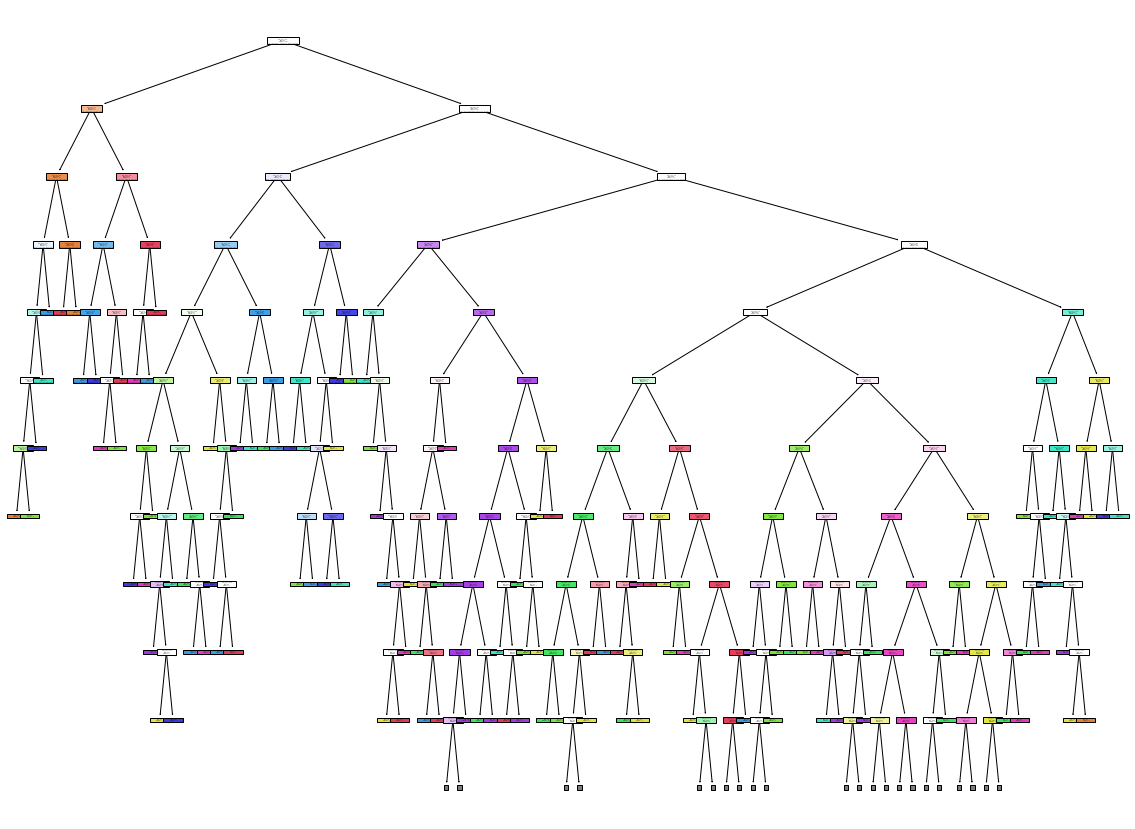

In [14]:
from sklearn.tree import plot_tree

plt.figure( figsize=(20,15) )
plot_tree(decision_tree, max_depth = 10, filled= True, feature_names=digits.feature_names)
plt.show()

#### Random Forest
- Random Forest는, 수많은 의사 결정 트리(Decision Tree)가 모여서 생성
- 수많은 요소(Feature)들을 기반으로 Target을 예측한다면, 분명 오버피팅이 일어날 것
- Random Forest 는 전체 Feature 중 랜덤으로 일부 Feature만 선택해 하나의 결정 트리를 만들고, 또 전체 Feature 중 랜덤으로 일부 Feature를 선택해 또 다른 결정 트리를 만들며, 여러 개의 의사 결정 트리를 만드는 방식으로 구성
- 이렇게 여러 결정 트리들이 내린 예측 값들 중, 가장 많이 나온 값을 최종 예측값
- 여러 가지 결과를 합치는 방식을 앙상블(Ensemble)
- 하나의 거대한 (깊이가 깊은) 결정 트리를 만드는 것이 아니라 여러 개의 작은 결정 트리를 만드는 것
- Random은, 각각의 의사 결정 트리를 만드는데 있어 쓰이는 Feature들을 무작위로 선정한다는 의미

#### 장점
- Classification(분류) 및 Regression(회귀) 문제에 모두 사용 가능
- Missing value(결측치)를 다루기 쉬움
- 대용량 데이터 처리에 효과적
- 모델의 노이즈를 심화시키는 Overfitting(오버피팅) 문제를 회피하여, 모델 정확도를 향상시킴
- Classification 모델에서 상대적으로 중요한 변수를 선정 및 Ranking 가능

In [16]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train) #학습

y_pred = random_forest.predict(X_test) #예측
print(classification_report(y_test, y_pred)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.90      0.97      0.93        36
           2       1.00      0.97      0.99        35
           3       0.97      0.97      0.97        37
           4       0.97      0.97      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       0.97      0.92      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



- 정확도는 확실하게 높아져서 96%가 나왔으며 나머지 성능지표도 골고루 높게 나왔다

#### svm
- Support Vector와 Hyperplane(초평면)을 이용해서 분류를 수행하게 되는 대표적인 선형 분류 알고리즘
- 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델로서 데이터 군으로부터 최대한 멀리 떨어지는 게 좋다
- Support Vectors: 결정 경계와 가까이 있는 데이터 포인트
- 마진(Margin): 결정 경계와 서포트 벡터 사이의 거리
- 최적의 결정 경계는 마진을 최대화
- 매우 빠르다는 장점이 있음

- Margin이 넓을수록 새로운 데이터를 잘 구분할 수 있다. (Margin 최대화 -> robustness 최대화)
- Kernel Trick: 저차원의 공간을 고차원의 공간으로 매핑해주는 작업. 데이터의 분포가 Linearly separable 하지 않을 경우 데이터를 고차원으로 이동시켜 Linearly separable하도록 만든다.
- cost: Decision Boundary와 Margin의 간격 결정. cost가 높으면 Margin이 좁아지고 train error가 작아진다. 그러나 새로운 데이터에서는 분류를 잘 할 수 있다. cost가 낮으면 Margin이 넓어지고, train error는 커진다.
- γ: 한 train data당 영향을 미치는 범위 결정. γ가 커지면 영향을 미치는 범위가 줄어들고, Decision Boundary에 가까이 있는 데이터만이 선의 굴곡에 영향을 준다. 따라서 Decision Boundary는 구불구불하게 그어진다. (오버피팅 초래 가능) 작아지면 데이터가 영향을 미치는 범위가 커지고, 대부분의 데이터가 Decision Boundary에 영향을 준다. 따라서 Decision Boundary는 직선에 가까워진다.

In [17]:
svm_model = svm.SVC(random_state=42)
svm_model.fit(X_train,y_train)#훈련
y_pred = svm_model.predict(X_test)#예측

print(classification_report(y_test, y_pred))#결과지표 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



- 99%의 정확도가 나왔음

#### Stochastic Gradient Descent Classifier (SGDClassifier)
- SGD (Stochastic Gradient Descent)이란? 배치 크기가 1인 경사하강법 알고리즘
- 확률적 경사하강법은 데이터 세트에서 무작위로 균일하게 선택한 하나의 데이터 포인트를 이용하여 각 단계의 예측 경사를 계산
- alpha : 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
- l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default=True)
- max_iter : 계산에 사용할 작업 수 (default=1000)
- tol : 정밀도
- shuffle : 에포크 후에 트레이닝 데이터를 섞는 유무 (default=True)
- epsilon : 손실 함수에서의 엡실론, 엡실론이 작은 경우, 현재 예측과 올바른 레이블 간의 차이가 임계 값보다 작으면 무시 (default=0.1)
- n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
- random_state : 난수 seed 설정
- learning_rate : 학습속도 (default='optimal')
- eta0 : 초기 학습속도 (default=0.0)
- power_t : 역 스케일링 학습률 (default=0.5)
- early_stopping : 유효성 검사 점수가 향상되지 않을 때 조기 중지여부 (default=False)
- validation_fraction : 조기 중지를위한 검증 세트로 설정할 교육 데이터의 비율 (default=0.1)
- n_iter_no_change : 조기중지 전 반복횟수 (default=5)
- class_weight : 클래스와 관련된 가중치 {class_label: weight} or “balanced”, default=None
- warm_start : 초기화 유무 (default=False)
- average : True로 설정하면 모든 업데이트에 대한 평균 SGD 가중치를 계산하고 결과를 coef_속성에 저장 (default=False)

In [18]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train,y_train)#훈련
y_pred = sgd_model.predict(X_test)#예측

print(classification_report(y_test, y_pred))#결과지표 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       0.95      1.00      0.97        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       0.95      0.97      0.96        36
           7       0.90      0.97      0.93        36
           8       0.91      0.83      0.87        35
           9       1.00      0.89      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.95       360
weighted avg       0.96      0.96      0.96       360



- 96%의 정확도가 나왔음

#### Logistic Regression
- 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘이며, 다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression)라고도 함
- 소프트맥스 함수: 클래스가 N개일 때, N차원의 벡터가 각 클래스가 정답일 확률을 표현하도록 정규화를 해주는 함수
- 결과값을 확률로 간주학 위해 0~1사이의 값을 반환하는 시그모이드 함수를 이용
- 시그모이드 함수: x값이 아무리 커지거나 작아져도 항상 0과 1사이의 값을 반환

In [19]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train,y_train)#훈련
y_pred = logistic_model.predict(X_test)#예측

print(classification_report(y_test, y_pred))#결과지표 확인

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.89      0.89        36
           2       0.97      1.00      0.99        35
           3       0.95      1.00      0.97        37
           4       0.95      1.00      0.97        36
           5       0.97      0.97      0.97        37
           6       1.00      0.97      0.99        36
           7       1.00      0.97      0.99        36
           8       0.86      0.86      0.86        35
           9       1.00      0.94      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 96%의 정확도가 나왔음

## 전체 평가
- digits dataset의 경우 SVM 알고리즘이 가장 정확하였다.
- 모델의 전체적인 정확도도 99%로 가장 높았으며, 실제 1이라는 숫자를 1이라고 예측한 Reall도 점수도 1에 거의 가까운 값을 보였기 때문에 digits dataset의 경우 SVM 알고리즘이 가장 적합하다고 생각한다.(f1-score 또한 가장 높음)
- 모델의 평가 지표로는 accuracy를 써도 될것으로 생각한다.feature값 또한 이상치로 생각되는 값들이 없었으며, target class의 분포 또한 비슷하게 분류되어 있었기 때문에 imbalance한 데이터도 아니었기 때문이다.
- 추가적으로 accuracy를 뒷받침 해줄 수 있는 Confusion Matrix도 함께 사용해도 된다.

## 와인 분류

### 데이터 불러오기

In [20]:
from sklearn.datasets import load_wine

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [21]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

In [25]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [26]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [22]:
# ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']
wine_data = wine.data
wine_data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [23]:
wine_label = wine.target
wine_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [24]:
wine_df = pd.DataFrame(data = wine_data, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [27]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


- 특성별로 평균의 차이가 많이 나는 것들이 있어 표준화 변환을 진행

In [28]:
wine_label_df = pd.DataFrame(wine_label)
wine_label_df.value_counts()

1    71
0    59
2    48
dtype: int64

- 클래스의 숫자가 대체적으로 고르게 나뉘어져 있음

### train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                   wine_label,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=wine_label)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  142 , X_test 개수:  36


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 모델 학습

#### Decision Tree

In [57]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train) #학습

y_pred = decision_tree.predict(X_test) #예측

print(classification_report(y_test, y_pred))#결과지표 확인

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      1.00      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



- 94%의 정확도가 나왔음

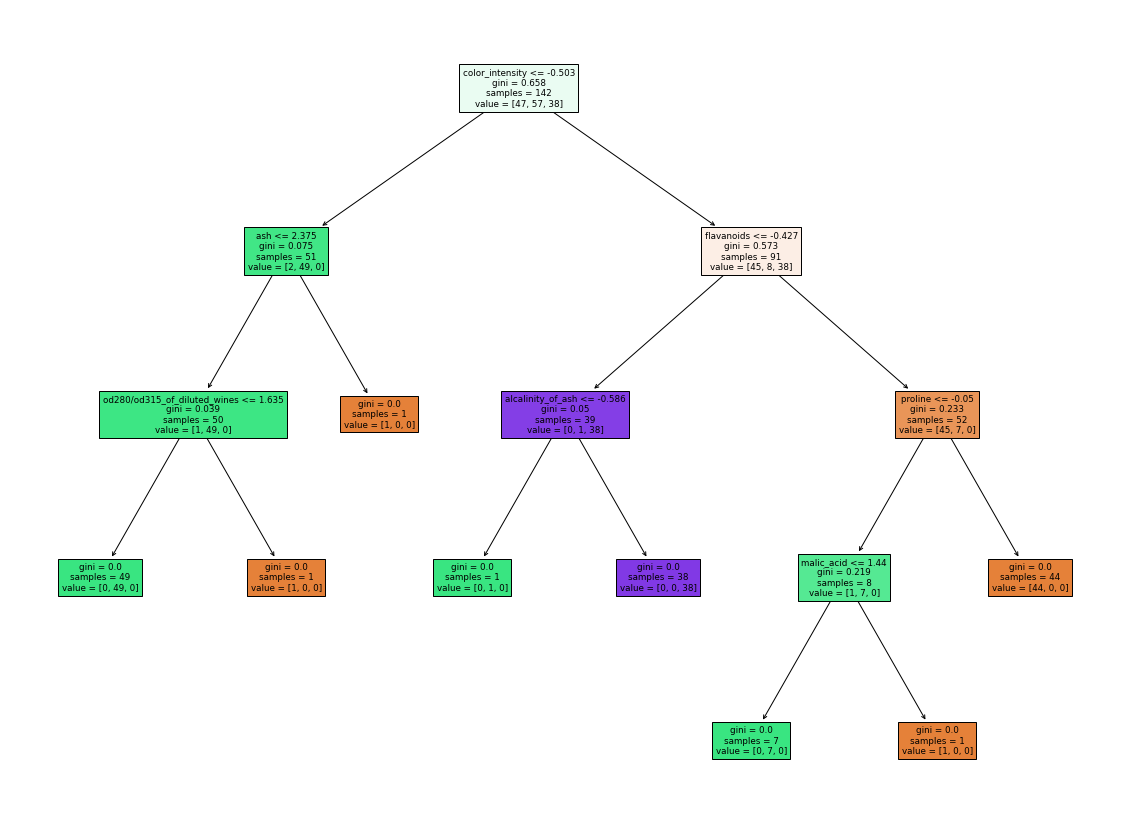

In [58]:
from sklearn.tree import plot_tree

plt.figure( figsize=(20,15) )
plot_tree(decision_tree, filled= True, feature_names=wine.feature_names)
plt.show()

#### random forest

In [33]:
random_forest = RandomForestClassifier(random_state=42) # RandomForest분류기 객체를 생성
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



- 와인을 100% 정확하게 분류했음

#### svm

In [34]:
svm_model = svm.SVC(random_state=42)
svm_model.fit(X_train,y_train)#훈련
y_pred = svm_model.predict(X_test)#예측

print(classification_report(y_test, y_pred))#결과지표 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



- 97%의 정확도를 보였음

#### SGD

In [35]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train,y_train)#훈련
y_pred = sgd_model.predict(X_test)#예측

print(classification_report(y_test, y_pred))#결과지표 확인

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



- 97%의 정확도를 보였음

#### Logistic Regression

In [36]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train,y_train)#훈련
y_pred = logistic_model.predict(X_test)#예측

print(classification_report(y_test, y_pred))#결과지표 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



- 97%의 정확도를 보였음

## 전체 평가
- wine dataset에서는 random forest 알고리즘의 성능이 가장 좋게 나왔다.
- 모든 데이터의 파라미터를 random_state만 고정시키고 돌렸을 경우, random forest는 모든 데이터를 정확하게 분류하였다.
- 모델의 평가 지표로는 정확도와 Confusion Matrix를 사용하면 될 것으로 생각된다. 데이터 전처리에서 표준화 변환을 진행하였고, 불균형한 데이터셋이 아니었기 때문에 해당 지표로도 모델을 충분히 설명할 수 있다.

## 유방암 여부 진단

In [37]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [38]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [39]:
cancer_data = cancer.data
cancer_label = cancer.target

In [40]:
cancer_df = pd.DataFrame(data = cancer_data, columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [41]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


- 특성값에 차이가 많이 나는 변수들이 존재해서 표준화 변환 진행

In [42]:
cancer_label_df = pd.DataFrame(cancer_label)
cancer_label_df.value_counts()

1    357
0    212
dtype: int64

- 클래스별로 적절하게 분류되어 있는것으로 생각됨

### train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data,
                                                   cancer_label,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=cancer_label)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  455 , X_test 개수:  114


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Decision Tree

In [45]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train) #학습

y_pred = decision_tree.predict(X_test) #예측

print(classification_report(y_test, y_pred))#결과지표 확인

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [46]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[39  3]
 [ 7 65]]


- 91%의 정확도를 보였음
- TN 39 / FN 7 / FP 3 / TP 65

#### Random Forest

In [47]:
random_forest = RandomForestClassifier(random_state=42) # RandomForest분류기 객체를 생성
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [48]:
print(confusion_matrix(y_test, y_pred))

[[39  3]
 [ 2 70]]


- 96%의 정확도를 보였음
- TN 39 / FN 2 / FP 3 / TP 70

#### SVM

In [49]:
svm_model = svm.SVC(random_state=42)
svm_model.fit(X_train,y_train)#훈련
y_pred = svm_model.predict(X_test)#예측

print(classification_report(y_test, y_pred))#결과지표 확인

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [50]:
print(confusion_matrix(y_test, y_pred))

[[41  1]
 [ 1 71]]


- 98%의 정확도를 보였음
- TN 41 / FN 1 / FP 1 / TP 71

#### SGD

In [51]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train,y_train)#훈련
y_pred = sgd_model.predict(X_test)#예측

print(classification_report(y_test, y_pred))#결과지표 확인

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [52]:
print(confusion_matrix(y_test, y_pred))

[[41  1]
 [ 3 69]]


- 96%의 정확도를 보였음
- TN 41 / FN 3 / FP 1 / TP 69

#### Logistic Regression

In [53]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train,y_train)#훈련
y_pred = logistic_model.predict(X_test)#예측

print(classification_report(y_test, y_pred))#결과지표 확인

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [54]:
print(confusion_matrix(y_test, y_pred))

[[41  1]
 [ 1 71]]


In [1]:
a = 1

- 98%의 정확도를 보였음
- TN 41 / FN 1 / FP 1 / TP 71

## 전체 평가
- 유방암 데이터 셋에서는 SVM 모델과 Logistic Regression 모델이 가장 좋은 성능을 보였다.
- 두 모델은 정확도 98% / confusion matrix TN 41 / FN 1 / FP 1 / TP 71를 보였으며, Recall값도 가장 높게 측정되었다.
- 평가지표로는 Recall을 사용하는것이 적합하다고 생각한다. Recall은 실제 양성을 양성이라고 예측한 비율을 뜻하는데, 암 같은 경우에는 실제 발생한 것중 암이 발생했다고 정확하게 예측하는것이 중요하기 때문이다.

## 참고 자료
### train_test_split
- https://blog.naver.com/PostView.naver?blogId=siniphia&logNo=221396370872
- https://wikidocs.net/43332
### Decision Tree
- https://inuplace.tistory.com/548
### Random Forest
- https://wooono.tistory.com/115
### SVM
- https://hleecaster.com/ml-svm-concept/
### 표준화변환
- https://alex-blog.tistory.com/entry/Machine-Learning-Random-Forest-%EB%9E%9C%EB%8D%A4-%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8-%EC%98%88%EC%8B%9C-feat-python
- https://bskyvision.com/entry/python-SVM-%EB%B6%84%EB%A5%98-%EB%AC%B8%EC%A0%9C%EB%A5%BC-%ED%86%B5%ED%95%B4-%EB%B0%B0%EC%9A%B0%EB%8A%94-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%ED%9B%88%EB%A0%A8-%EB%B0%8F-%ED%85%8C%EC%8A%A4%ED%8A%B8

# 회고
- 오랜만에 지도학습 모델들을 돌려봐서 헷갈렸지만 재미있었다.
- 아직은 기본적인 모델과 간단한 데이터로 실험을 했기 때문에 할만 했다.
- 하지만 fundamental을 통해 배웠던 것들을 시도해보려고 했지만, 제대로 활용을 하지 못했던 것이 아쉽다.
- 다른 모델들은 다 써봤는데, SGD 모델은 처음 써본것 같아서 새로웠고, logistic 모델에 오즈비나 기타 모델들의 파라미터 같은 것들은 정리를 해두는것이 좋을것으로 생각된다.
- 앞으로 계속 진행될 Exploration을 깃허브에 올리는 것까지 모든 과정들을 철저하게 연습해서 푸른 잔디밭으로 만들고 싶다.